In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

sns.set(style="whitegrid", palette="Blues_r")
palette=['#2c3e6c', '#b0c4de']


In [2]:
df = pd.read_csv("Project_Data.csv")

print("Data Shape:", df.shape)
print("Data Nulls:\n", df.isna().sum())

# Check logical reason for churn_reason nulls
nullReason = df[df['Churn Reason'].isna()].copy()
print("Churn Reason null check:\n", nullReason['Churn Value'].value_counts())

# Rename columns for consistency early on
df = df.rename(columns={
    'CustomerID': 'customer_id',
    'Churn Label': 'churn_flag',
    'Churn Value': 'churn_value',
    'Churn Reason': 'churn_reason',
    'Tenure Months': 'tenure_months',
    'Monthly Charges': 'monthly_charges',
    'Total Charges': 'total_charges'
})


Data Shape: (7043, 31)
Data Nulls:
 CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Reason         5174
dtype: int64
Churn Reason null check:
 Churn Value
0    5174
Name: count, dtype: int64


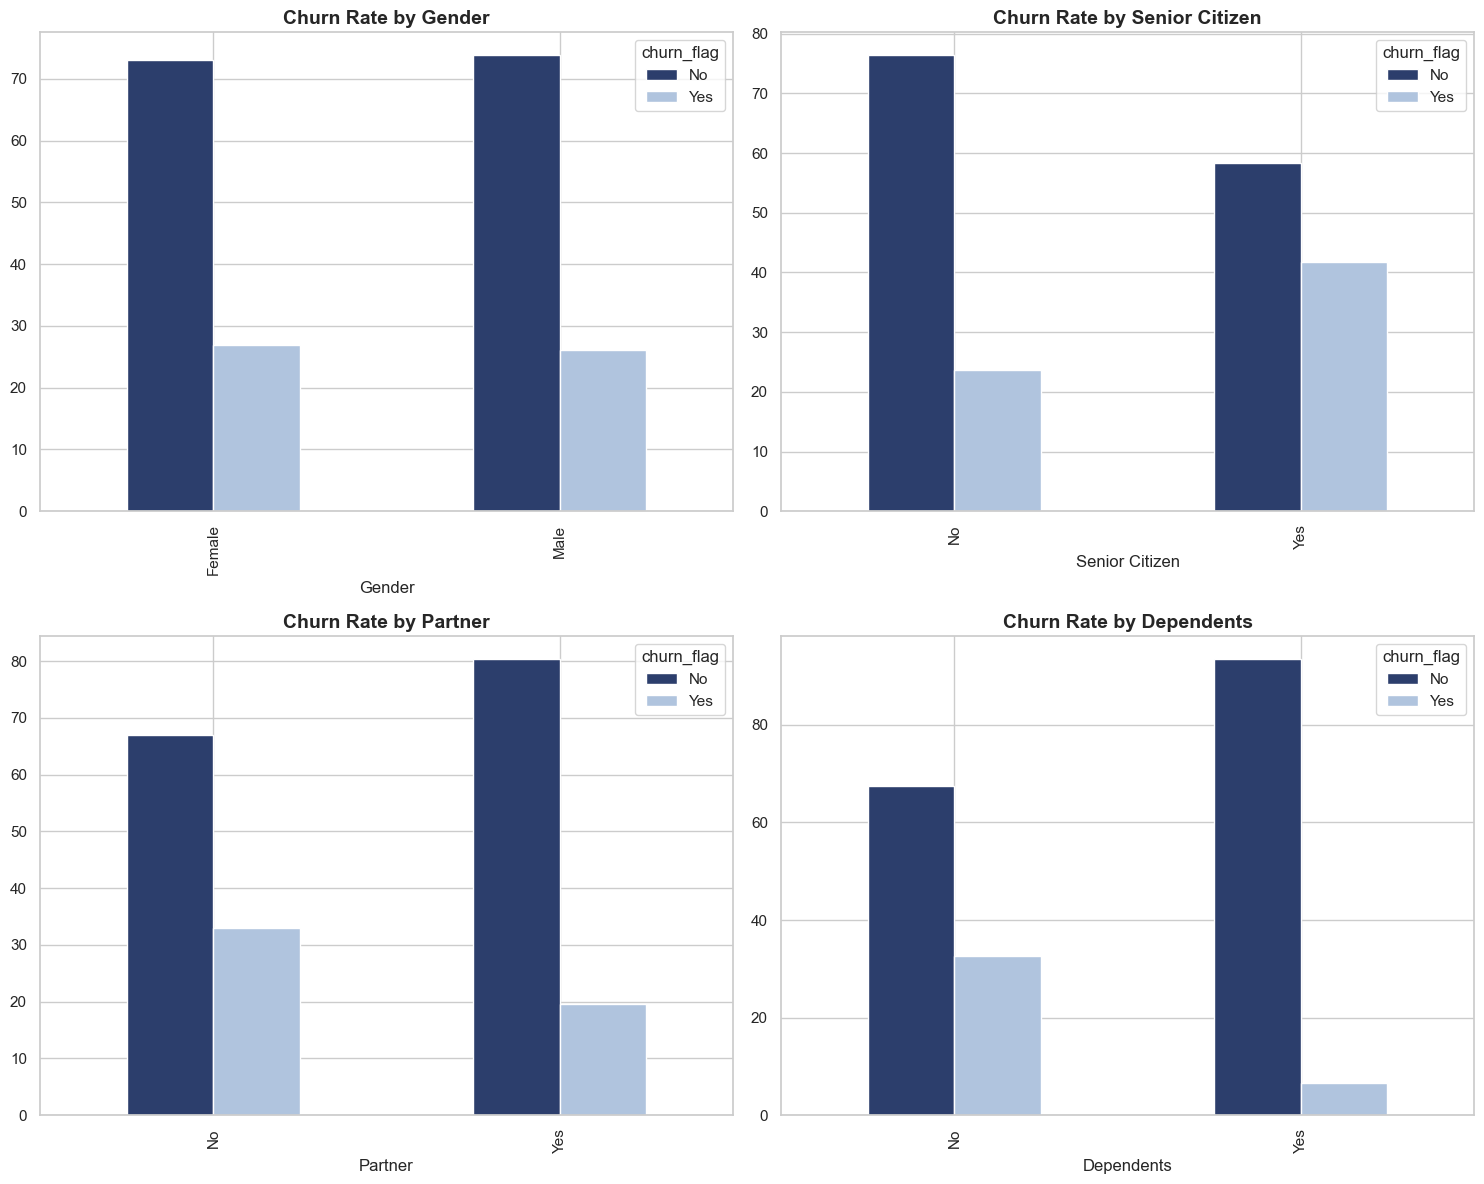

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Churn by Gender
gender_churn = pd.crosstab(df['Gender'], df['churn_flag'], normalize='index') * 100
gender_churn.plot(kind='bar', ax=axes[0,0], color=palette)
axes[0,0].set_title('Churn Rate by Gender', fontsize=14, fontweight='bold')

# Churn by Senior Citizen
senior_churn = pd.crosstab(df['Senior Citizen'], df['churn_flag'], normalize='index') * 100
senior_churn.plot(kind='bar', ax=axes[0,1], color=palette)
axes[0,1].set_title('Churn Rate by Senior Citizen', fontsize=14, fontweight='bold')

# Churn by Partner
partner_churn = pd.crosstab(df['Partner'], df['churn_flag'], normalize='index') * 100
partner_churn.plot(kind='bar', ax=axes[1,0], color=palette)
axes[1,0].set_title('Churn Rate by Partner', fontsize=14, fontweight='bold')

# Churn by Dependents
dependents_churn = pd.crosstab(df['Dependents'], df['churn_flag'], normalize='index') * 100
dependents_churn.plot(kind='bar', ax=axes[1,1], color=palette)
axes[1,1].set_title('Churn Rate by Dependents', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


C:\Users\danjm\AppData\Local\Temp\ipykernel_25972\3489098999.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='churn_flag', y='monthly_charges', ax=axes[1,1], palette=palette)


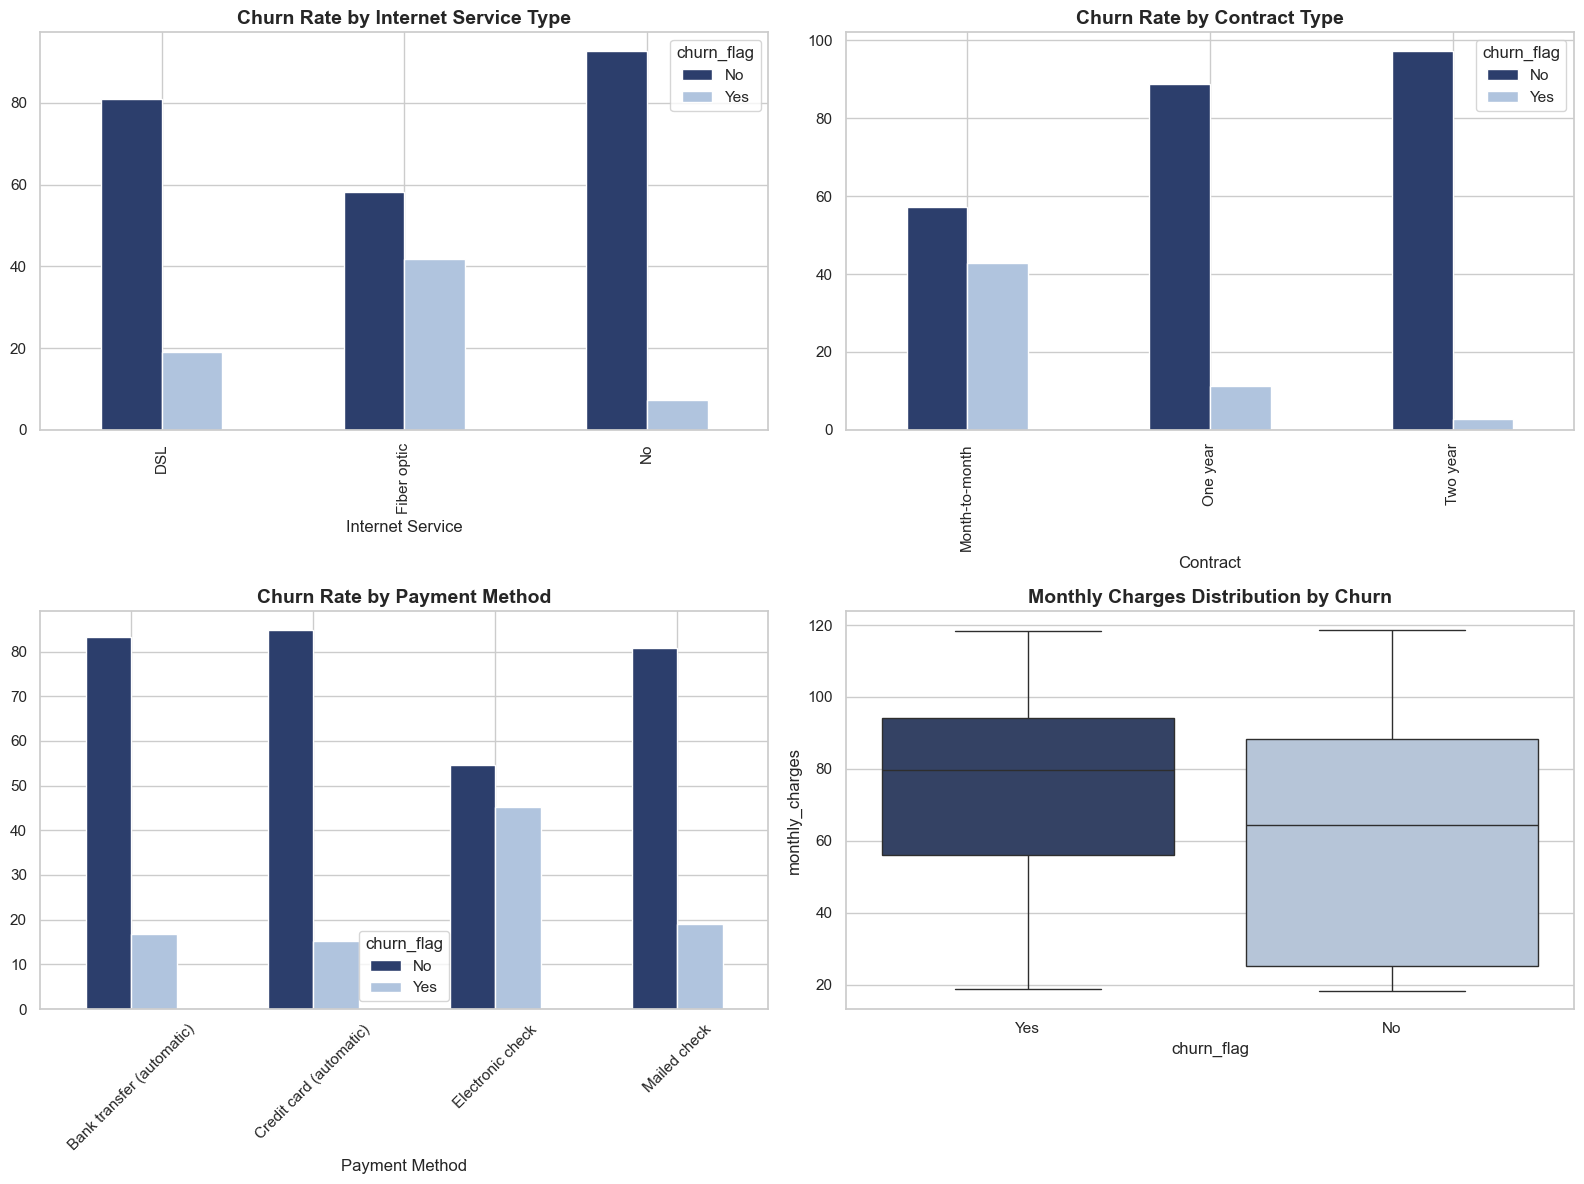

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Internet Service
internet_churn = pd.crosstab(df['Internet Service'], df['churn_flag'], normalize='index') * 100
internet_churn.plot(kind='bar', ax=axes[0,0], color=palette)
axes[0,0].set_title('Churn Rate by Internet Service Type', fontsize=14, fontweight='bold')

# Contract Type
contract_churn = pd.crosstab(df['Contract'], df['churn_flag'], normalize='index') * 100
contract_churn.plot(kind='bar', ax=axes[0,1], color=palette)
axes[0,1].set_title('Churn Rate by Contract Type', fontsize=14, fontweight='bold')

# Payment Method
payment_churn = pd.crosstab(df['Payment Method'], df['churn_flag'], normalize='index') * 100
payment_churn.plot(kind='bar', ax=axes[1,0], color=palette)
axes[1,0].set_title('Churn Rate by Payment Method', fontsize=14, fontweight='bold')
axes[1,0].tick_params(axis='x', rotation=45)

# Monthly Charges
sns.boxplot(data=df, x='churn_flag', y='monthly_charges', ax=axes[1,1], palette=palette)
axes[1,1].set_title('Monthly Charges Distribution by Churn', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


,All Churners,Fiber Optic,DSL,No Internet,FiberOptic_%,DSL_%,NoInternet_%
churn_reason,,,,,,,
Attitude of support person,192,133,41,18.0,69.27,21.35,9.38
Competitor offered higher download speeds,189,130,51,8.0,68.78,26.98,4.23
Competitor offered more data,162,120,31,11.0,74.07,19.14,6.79
Don't know,154,97,51,6.0,62.99,33.12,3.90
Competitor made better offer,140,104,23,13.0,74.29,16.43,9.29
Attitude of service provider,135,101,29,5.0,74.81,21.48,3.70
Competitor had better devices,130,82,44,4.0,63.08,33.85,3.08
Network reliability,103,67,30,6.0,65.05,29.13,5.83
Product dissatisfaction,102,66,30,6.0,64.71,29.41,5.88


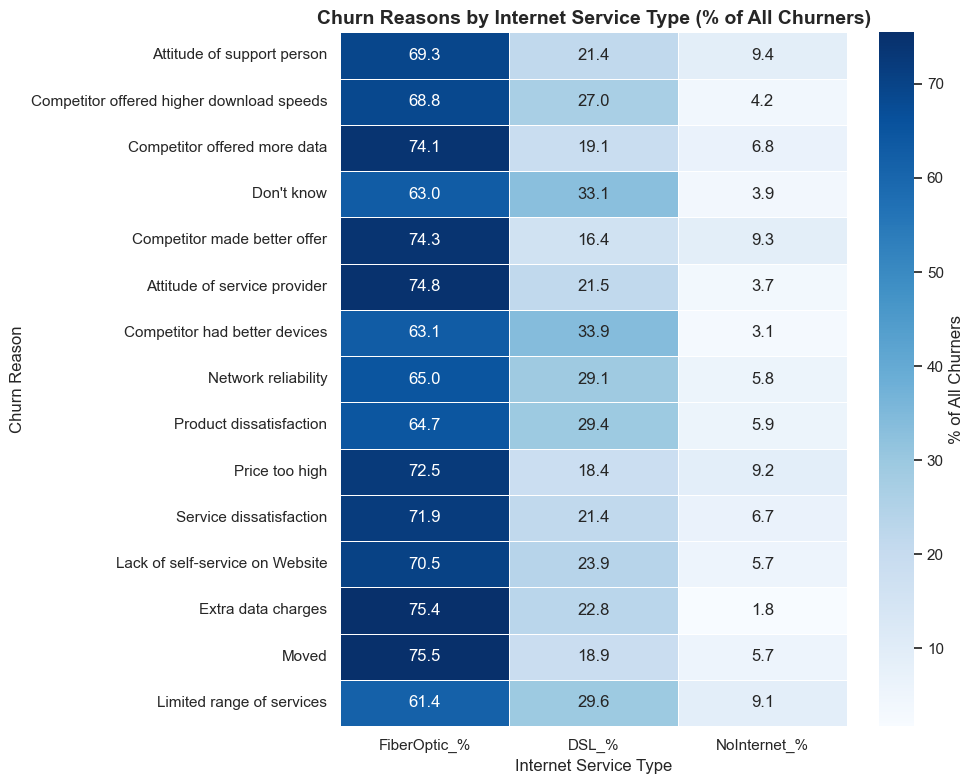

In [5]:
# Filter churned customers
churned_df = df[df['churn_value'] == 1].copy()

# Count total churn reasons
all_reasons = churned_df['churn_reason'].value_counts()

# Count churn reasons per internet type
fibre_reasons = churned_df[churned_df['Internet Service'] == 'Fiber optic']['churn_reason'].value_counts()
dsl_reasons   = churned_df[churned_df['Internet Service'] == 'DSL']['churn_reason'].value_counts()
none_reasons  = churned_df[churned_df['Internet Service'] == 'No']['churn_reason'].value_counts()

# Combine into a single DataFrame
compare = pd.concat([all_reasons, fibre_reasons, dsl_reasons, none_reasons], axis=1)
compare.columns = ['All Churners', 'Fiber Optic', 'DSL', 'No Internet']
compare = compare.fillna(0)

# Calculate each as % of all churners
compare['FiberOptic_%'] = (compare['Fiber Optic'] / compare['All Churners']) * 100
compare['DSL_%']        = (compare['DSL'] / compare['All Churners']) * 100
compare['NoInternet_%'] = (compare['No Internet'] / compare['All Churners']) * 100

# Sort by Fibre share for readability
compare = compare.sort_values('All Churners', ascending=False).round(2)

# Display top 15 churn reasons
display(compare.head(15))

compare_pct = compare[['FiberOptic_%', 'DSL_%', 'NoInternet_%']].head(15)

plt.figure(figsize=(10, 8))
sns.heatmap(compare_pct, annot=True, fmt=".1f", cmap='Blues', linewidths=0.5, cbar_kws={'label': '% of All Churners'})
plt.title("Churn Reasons by Internet Service Type (% of All Churners)", fontsize=14, fontweight='bold')
plt.xlabel("Internet Service Type")
plt.ylabel("Churn Reason")
plt.tight_layout()
plt.show()

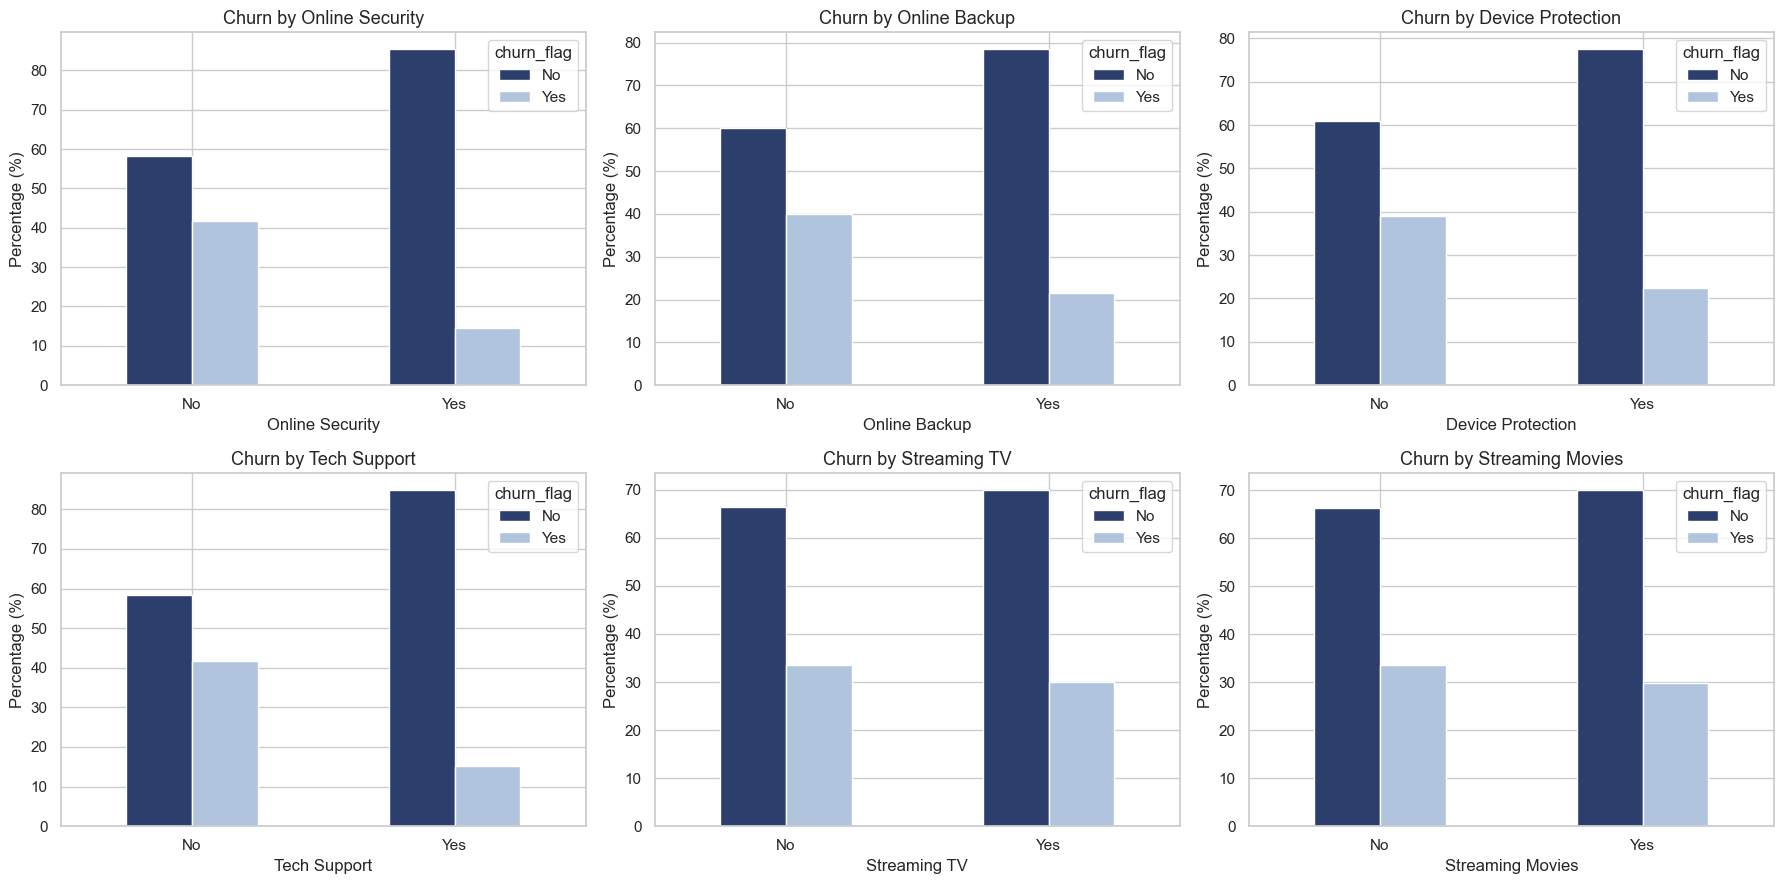

In [6]:
columns = ['Online Security', 'Online Backup', 'Device Protection',
           'Tech Support', 'Streaming TV', 'Streaming Movies']
titles = ['Online Security', 'Online Backup', 'Device Protection',
          'Tech Support', 'Streaming TV', 'Streaming Movies']

fig, axes = plt.subplots(2, 3, figsize=(18, 9))
axes = axes.flatten()

df_internet = df[df['Internet Service'] != 'No']

for idx, (col, title) in enumerate(zip(columns, titles)):
    crosstab = pd.crosstab(df_internet[col], df_internet['churn_flag'], normalize='index') * 100
    crosstab.plot(kind='bar', ax=axes[idx], color=palette)
    axes[idx].set_title(f'Churn by {title}', fontsize=13)
    axes[idx].set_ylabel('Percentage (%)')
    axes[idx].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


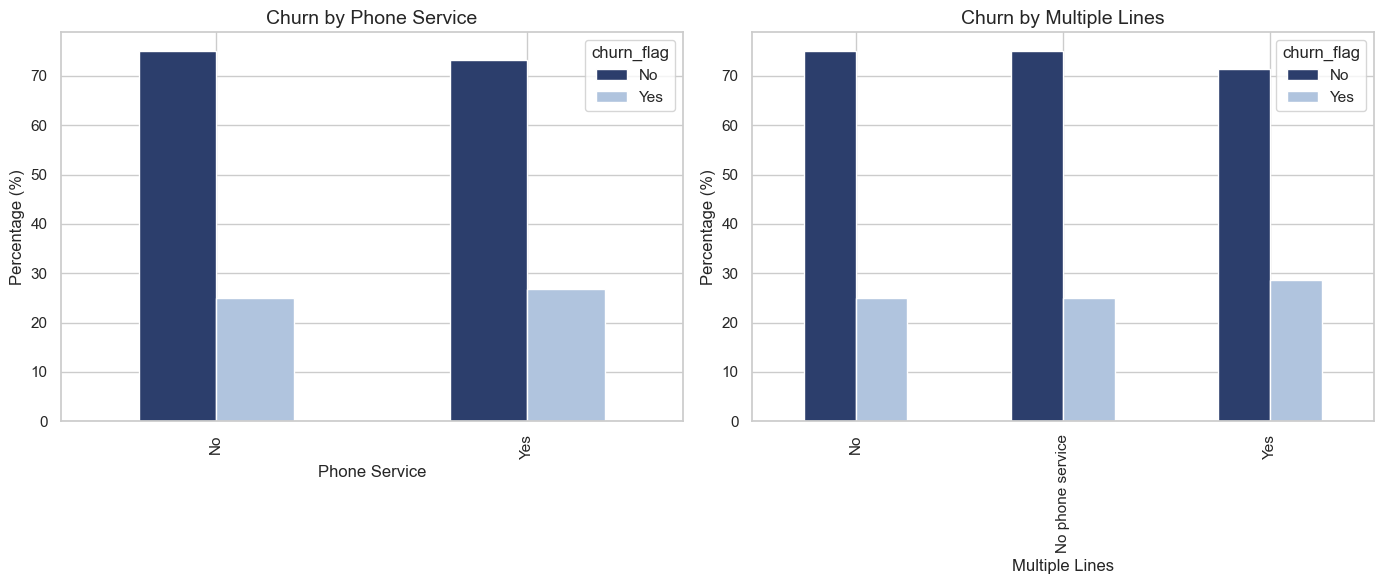

In [7]:
columns = ['Phone Service', 'Multiple Lines']
titles = ['Churn by Phone Service', 'Churn by Multiple Lines']

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for idx, (col, title) in enumerate(zip(columns, titles)):
    crosstab = pd.crosstab(df[col], df['churn_flag'], normalize='index') * 100
    crosstab.plot(kind='bar', ax=axes[idx], color=palette)
    axes[idx].set_title(title, fontsize=14)
    axes[idx].set_ylabel('Percentage (%)')

plt.tight_layout()
plt.show()


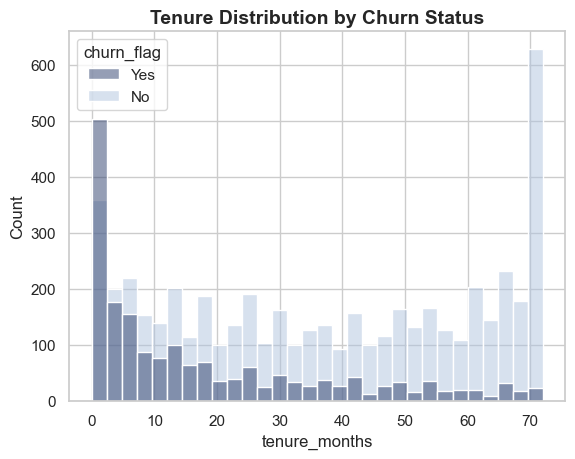

In [8]:
sns.histplot(data=df, x='tenure_months', hue='churn_flag', bins=30, palette=palette)
plt.title('Tenure Distribution by Churn Status', fontsize=14, fontweight='bold')
plt.show()


C:\Users\danjm\AppData\Local\Temp\ipykernel_25972\2414609830.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=reasonCounts, x='Churn Reason', y='Count', palette='Blues_r')


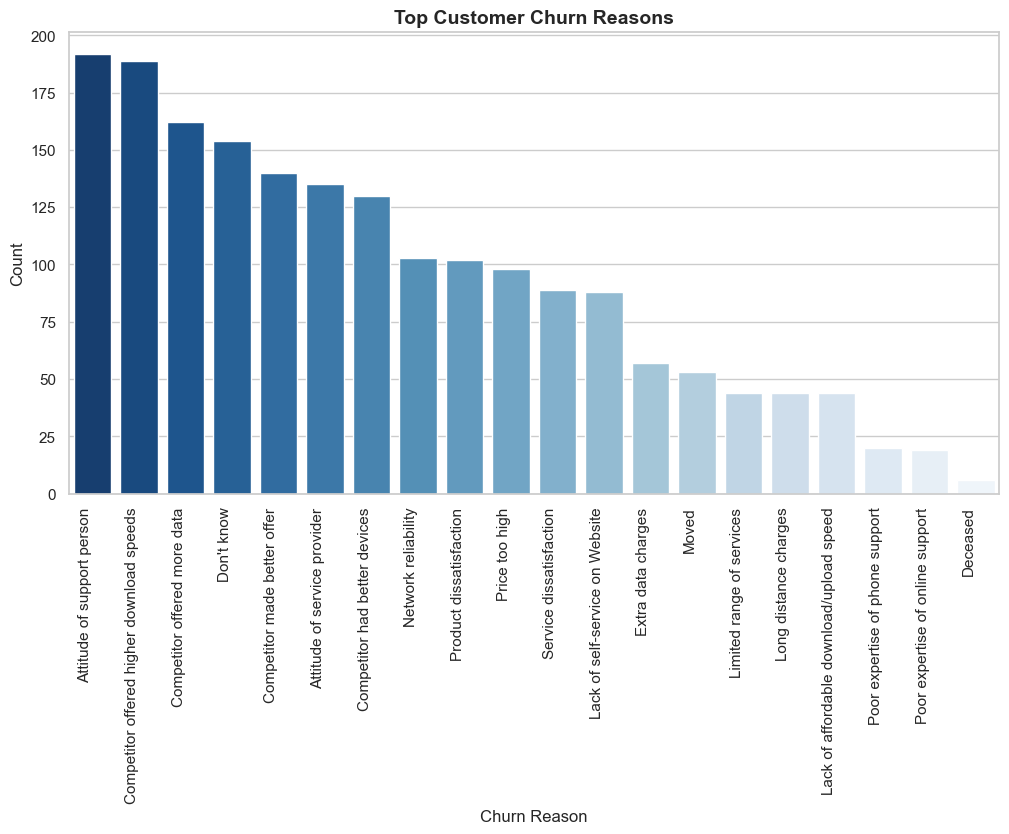

In [9]:
churned = df[df['churn_value'] == 1]
reasonCounts = churned['churn_reason'].value_counts().reset_index()
reasonCounts.columns = ['Churn Reason', 'Count']

plt.figure(figsize=(12,6))
sns.barplot(data=reasonCounts, x='Churn Reason', y='Count', palette='Blues_r')
plt.xticks(rotation=90, ha='right')
plt.title('Top Customer Churn Reasons', fontsize=14, fontweight='bold')
plt.show()


In [10]:
# Create estimated lifetime value
df['estimated_lifetime_value'] = df['monthly_charges'] * df['tenure_months']

# Separate churned customers
churned_df = df[df['churn_value'] == 1].copy()

# Calculate the overall financial loss
total_loss = churned_df['estimated_lifetime_value'].sum()
print(f"Total Estimated Lifetime Value Lost to Churn: £{total_loss:,.0f}")


Total Estimated Lifetime Value Lost to Churn: £2,862,577


In [11]:
# Define threshold for top 10%
threshold = churned_df['estimated_lifetime_value'].quantile(0.90)

high_value_churners = churned_df[churned_df['estimated_lifetime_value'] >= threshold].copy()

print(f"High-Value Threshold: £{threshold:,.0f}")
print(f"Number of High-Value Churners: {len(high_value_churners)}")
print(f"Share of Total Churners: {len(high_value_churners) / len(churned_df):.1%}")


High-Value Threshold: £4,597
Number of High-Value Churners: 187
Share of Total Churners: 10.0%


C:\Users\danjm\AppData\Local\Temp\ipykernel_25972\3204738434.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='churn_flag', y='estimated_lifetime_value', palette=palette)


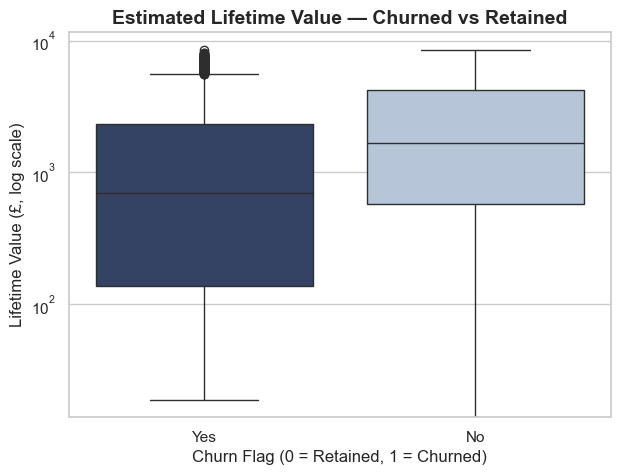

In [12]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x='churn_flag', y='estimated_lifetime_value', palette=palette)
plt.yscale('log')
plt.title("Estimated Lifetime Value — Churned vs Retained", fontsize=14, fontweight='bold')
plt.xlabel("Churn Flag (0 = Retained, 1 = Churned)")
plt.ylabel("Lifetime Value (£, log scale)")
plt.show()


C:\Users\danjm\AppData\Local\Temp\ipykernel_25972\1894123937.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=high_value_churners, x='Contract', ax=axes[0], palette='Blues_r')
C:\Users\danjm\AppData\Local\Temp\ipykernel_25972\1894123937.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=high_value_churners, x='Internet Service', ax=axes[1], palette='Blues_r')


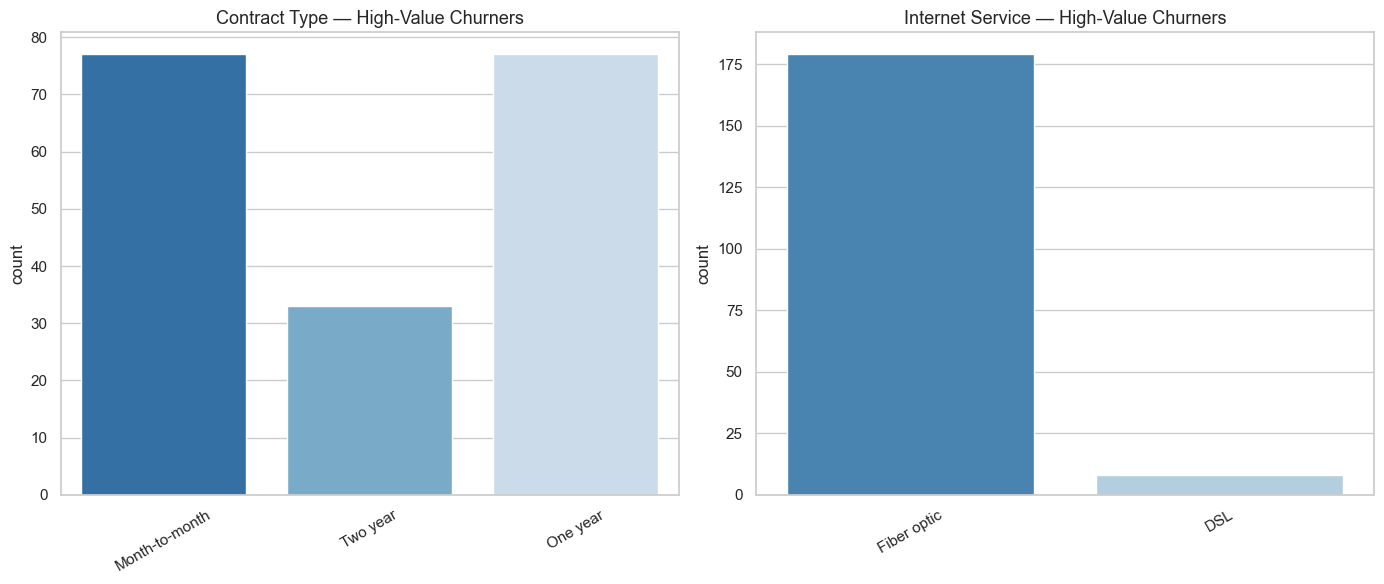

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(data=high_value_churners, x='Contract', ax=axes[0], palette='Blues_r')
axes[0].set_title('Contract Type — High-Value Churners', fontsize=13)
axes[0].set_xlabel('')
axes[0].tick_params(axis='x', rotation=30)

sns.countplot(data=high_value_churners, x='Internet Service', ax=axes[1], palette='Blues_r')
axes[1].set_title('Internet Service — High-Value Churners', fontsize=13)
axes[1].set_xlabel('')
axes[1].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()


C:\Users\danjm\AppData\Local\Temp\ipykernel_25972\3449881145.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reasons.values, y=reasons.index, palette='Blues_r')


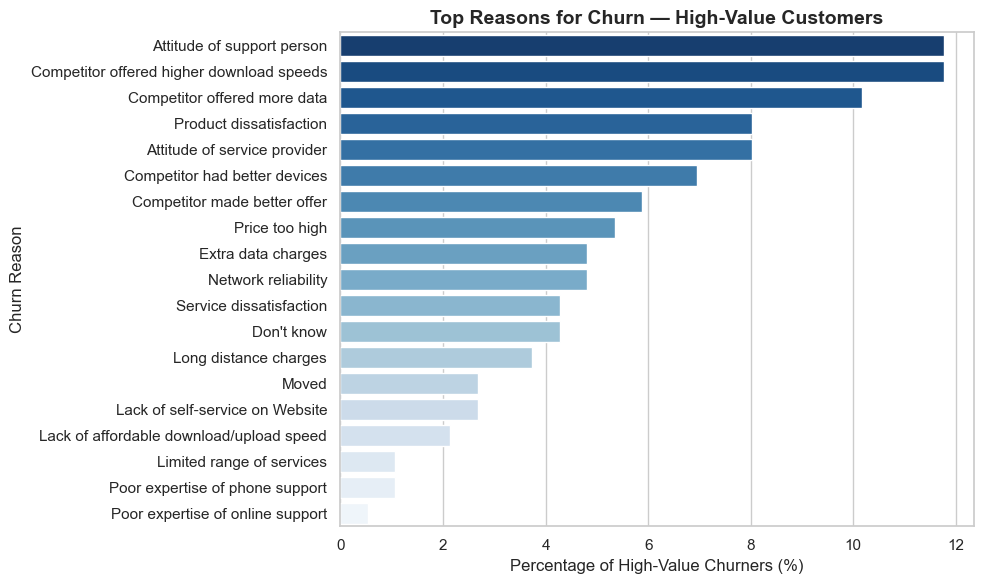

In [14]:
reasons = high_value_churners['churn_reason'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=reasons.values, y=reasons.index, palette='Blues_r')
plt.title("Top Reasons for Churn — High-Value Customers", fontsize=14, fontweight='bold')
plt.xlabel("Percentage of High-Value Churners (%)")
plt.ylabel("Churn Reason")
plt.tight_layout()
plt.show()


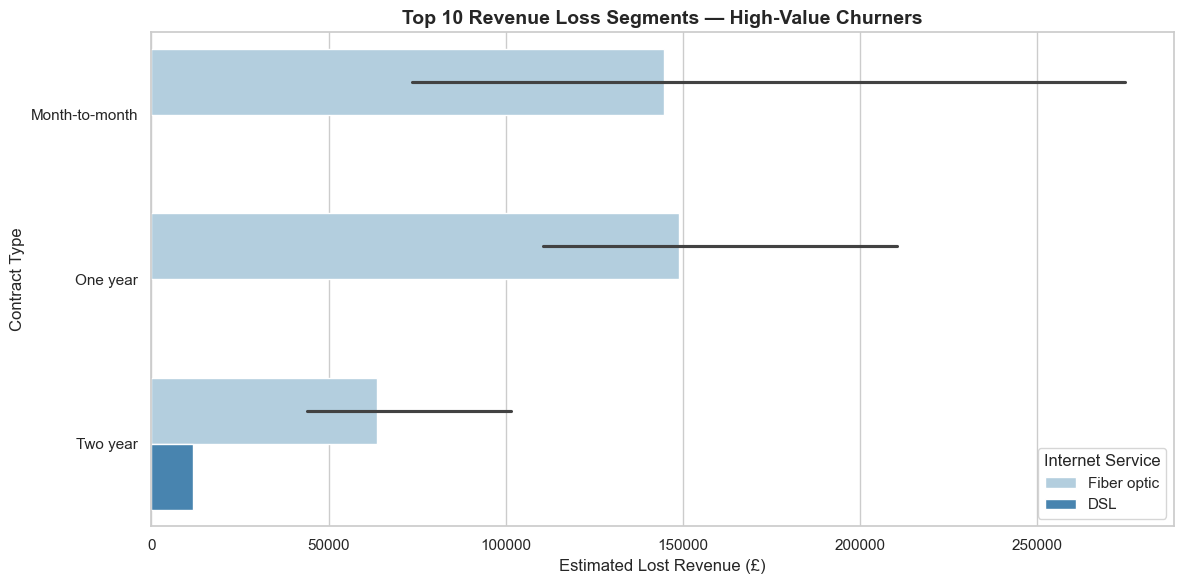

In [15]:
revenue_loss = (
    high_value_churners.groupby(['Contract', 'Internet Service', 'Payment Method'])
    ['estimated_lifetime_value']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

plt.figure(figsize=(12, 6))
sns.barplot(data=revenue_loss.head(10), x='estimated_lifetime_value',
            y='Contract', hue='Internet Service', palette='Blues')
plt.title("Top 10 Revenue Loss Segments — High-Value Churners", fontsize=14, fontweight='bold')
plt.xlabel("Estimated Lost Revenue (£)")
plt.ylabel("Contract Type")
plt.legend(title='Internet Service')
plt.tight_layout()
plt.show()


In [16]:
num_features = ['monthly_charges', 'tenure_months', 'estimated_lifetime_value']
profile = pd.DataFrame({
    'High-Value Churners': high_value_churners[num_features].mean(),
    'All Churners': churned_df[num_features].mean()
}).T.round(1)

display(profile)


,monthly_charges,tenure_months,estimated_lifetime_value
High-Value Churners,102.0,59.0,6009.5
All Churners,74.4,18.0,1531.6


In [17]:
target_list = high_value_churners[['customer_id', 'monthly_charges', 'tenure_months',
                                   'Contract', 'Payment Method', 'Internet Service',
                                   'churn_reason', 'estimated_lifetime_value']]

target_list = target_list.sort_values('estimated_lifetime_value', ascending=False)
target_list.to_csv('high_value_churners_target_list.csv', index=False)
print("✅ Exported high_value_churners_target_list.csv")


✅ Exported high_value_churners_target_list.csv



Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.86      1035
           1       0.64      0.51      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.72      1409
weighted avg       0.78      0.79      0.79      1409

ROC AUC: 0.8372329432431733


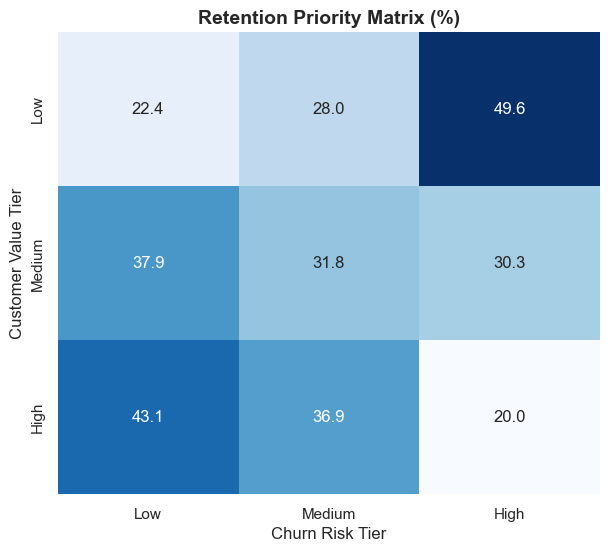

🎯 Critical Retention Targets: 469 customers


,customer_id,monthly_charges,tenure_months,estimated_lifetime_value,churn_probability,Contract,Internet Service,Payment Method
3,7892-POOKP,104.80,28,2934.40,0.690000,Month-to-month,Fiber optic,Electronic check
4,0280-XJGEX,103.70,49,5081.30,0.720000,Month-to-month,Fiber optic,Bank transfer (automatic)
8,6467-CHFZW,99.35,47,4669.45,0.616667,Month-to-month,Fiber optic,Electronic check
24,3192-NQECA,110.00,68,7480.00,0.693333,Two year,Fiber optic,Bank transfer (automatic)
41,0691-JVSYA,94.85,53,5027.05,0.716667,One year,Fiber optic,Bank transfer (automatic)
70,4484-GLZOU,105.05,52,5462.60,0.826667,Month-to-month,Fiber optic,Electronic check
80,2321-OMBXY,80.30,38,3051.40,0.716667,One year,DSL,Credit card (automatic)
82,5020-ZSTTY,82.45,54,4452.30,0.693333,One year,DSL,Bank transfer (automatic)
86,4322-RCYMT,75.80,68,5154.40,0.656667,One year,DSL,Bank transfer (automatic)
87,6680-NENYN,104.60,43,4497.80,0.686667,Two year,Fiber optic,Electronic check


💰 Potential Lifetime Value at Risk (High-Risk × High-Value): £2,212,944
⚠️ This represents 77.3% of total churned lifetime revenue.


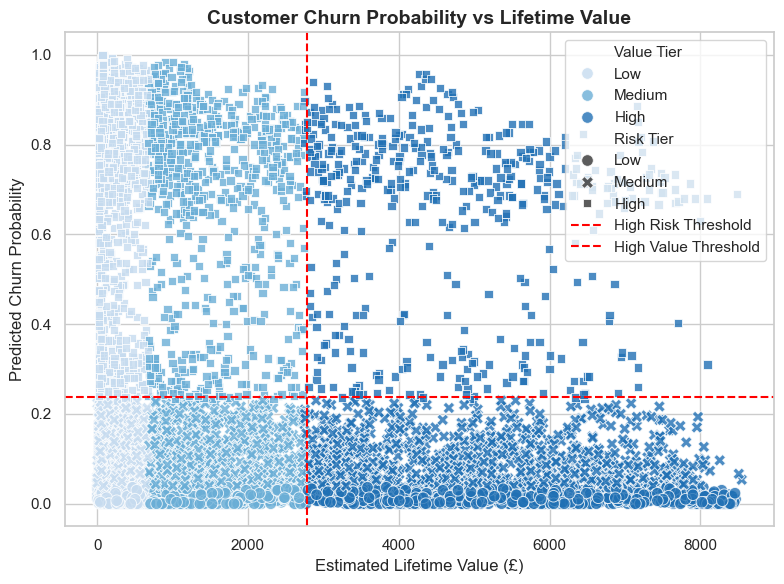

✅ Exported critical_retention_targets.csv (High Value × High Risk Customers)


In [18]:
# ============================================================
# 🔥 RETENTION PRIORITY MATRIX — HIGH-RISK × HIGH-VALUE
# ============================================================

# --- Feature prep for model ---
drop_cols = [
    'Country', 'State', 'City', 'Zip Code', 'Lat Long',
    'Latitude', 'Longitude', 'customer_id', 'churn_flag',
    'churn_value', 'churn_reason'
]

# Convert categorical columns to numeric for modeling
from sklearn.preprocessing import LabelEncoder
df_model = df.copy()
cat_cols = df_model.select_dtypes(include=['object']).columns
for col in cat_cols:
    df_model[col] = LabelEncoder().fit_transform(df_model[col].astype(str))

X = df_model.drop(columns=drop_cols, errors='ignore')
y = df_model['churn_flag']

# --- Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Random Forest Model ---
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

# --- Evaluate performance ---
from sklearn.metrics import classification_report, roc_auc_score

y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

# --- Predict churn probability for all customers ---
df['churn_probability'] = rf.predict_proba(X)[:, 1]

# ============================================================
# 🧮 CREATE VALUE & RISK TIERS
# ============================================================

df['Value Tier'] = pd.qcut(df['estimated_lifetime_value'], q=3, labels=['Low', 'Medium', 'High'])
df['Risk Tier'] = pd.qcut(df['churn_probability'], q=3, labels=['Low', 'Medium', 'High'])

# --- Cross-tab: Proportion of customers by value & risk ---
priority_matrix = pd.crosstab(df['Value Tier'], df['Risk Tier'], normalize='index') * 100

plt.figure(figsize=(7,6))
sns.heatmap(priority_matrix, annot=True, fmt=".1f", cmap='Blues', cbar=False)
plt.title("Retention Priority Matrix (%)", fontsize=14, fontweight='bold')
plt.xlabel("Churn Risk Tier")
plt.ylabel("Customer Value Tier")
plt.show()

# ============================================================
# 🎯 IDENTIFY HIGH-RISK × HIGH-VALUE CUSTOMERS
# ============================================================

critical_customers = df[
    (df['Value Tier'] == 'High') & (df['Risk Tier'] == 'High')
][[
    'customer_id', 'monthly_charges', 'tenure_months',
    'estimated_lifetime_value', 'churn_probability',
    'Contract', 'Internet Service', 'Payment Method'
]]

print(f"🎯 Critical Retention Targets: {len(critical_customers)} customers")
display(critical_customers.head(10))

# ============================================================
# 💸 FINANCIAL IMPACT OF HIGH-RISK × HIGH-VALUE CUSTOMERS
# ============================================================

critical_loss = critical_customers['estimated_lifetime_value'].sum()
total_loss = df[df['churn_value'] == 1]['estimated_lifetime_value'].sum()

print(f"💰 Potential Lifetime Value at Risk (High-Risk × High-Value): £{critical_loss:,.0f}")
print(f"⚠️ This represents {100 * critical_loss / total_loss:.1f}% of total churned lifetime revenue.")

# ============================================================
# 📈 SCATTER PLOT — RISK VS VALUE
# ============================================================

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df, x='estimated_lifetime_value', y='churn_probability',
    hue='Value Tier', style='Risk Tier', palette='Blues', s=70, alpha=0.8
)
plt.axhline(df['churn_probability'].quantile(0.67), color='red', linestyle='--', label='High Risk Threshold')
plt.axvline(df['estimated_lifetime_value'].quantile(0.67), color='red', linestyle='--', label='High Value Threshold')
plt.title("Customer Churn Probability vs Lifetime Value", fontsize=14, fontweight='bold')
plt.xlabel("Estimated Lifetime Value (£)")
plt.ylabel("Predicted Churn Probability")
plt.legend()
plt.tight_layout()
plt.show()

# ============================================================
# 📤 EXPORT CRITICAL RETENTION TARGETS
# ============================================================

critical_customers.to_csv("critical_retention_targets.csv", index=False)
print("✅ Exported critical_retention_targets.csv (High Value × High Risk Customers)")


C:\Users\danjm\AppData\Local\Temp\ipykernel_25972\3203410928.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Value Tier', 'Risk Tier'])


,Value Tier,Risk Tier,Customer_Count,Total_Lifetime_Value,Avg_Lifetime_Value,Avg_Churn_Prob
0,Low,Low,527,172843.20,327.98,0.01
1,Low,Medium,658,161881.65,246.02,0.12
2,Low,High,1164,241092.20,207.12,0.72
3,Medium,Low,888,1268785.45,1428.81,0.01
4,Medium,Medium,746,1168813.45,1566.77,0.11
5,Medium,High,712,1075245.25,1510.18,0.67
6,High,Low,1013,5385862.80,5316.75,0.01
7,High,Medium,866,4367623.35,5043.44,0.10
8,High,High,469,2212944.10,4718.43,0.64


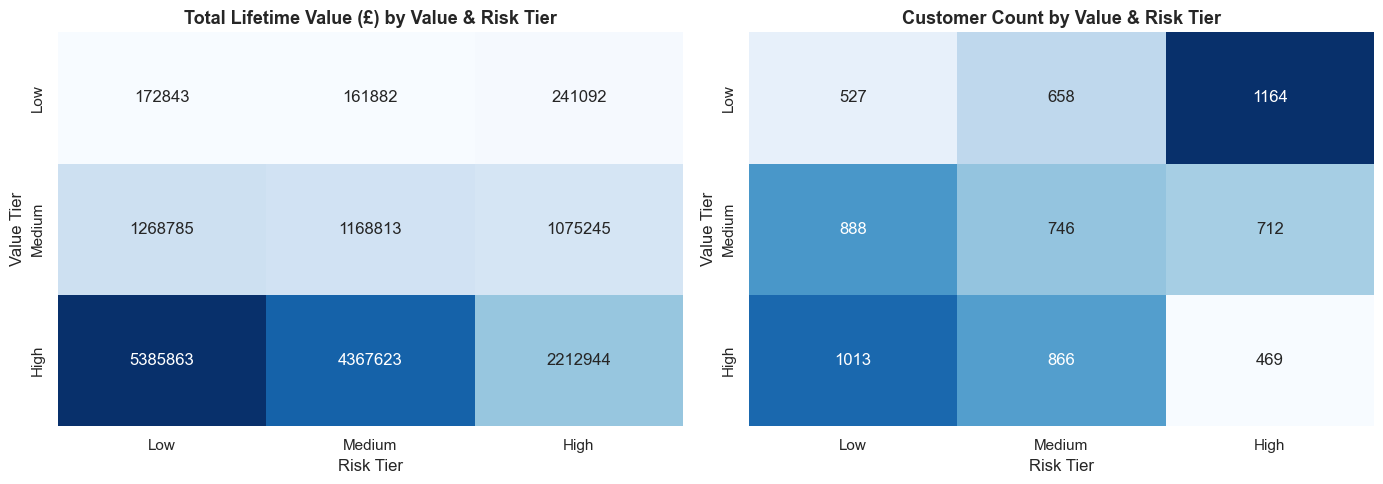

In [19]:
# ============================================================
# 💰 SUMMARY TABLE — REVENUE & CUSTOMER COUNT BY RISK × VALUE
# ============================================================

# Aggregate total value and counts per segment
matrix_summary = (
    df.groupby(['Value Tier', 'Risk Tier'])
    .agg(
        Customer_Count=('customer_id', 'count'),
        Total_Lifetime_Value=('estimated_lifetime_value', 'sum'),
        Avg_Lifetime_Value=('estimated_lifetime_value', 'mean'),
        Avg_Churn_Prob=('churn_probability', 'mean')
    )
    .round(2)
    .reset_index()
)

# Sort for readability (Low → High)
matrix_summary = matrix_summary.sort_values(['Value Tier', 'Risk Tier'])

display(matrix_summary)

# --- Optional: Pivot for a clean report-style layout ---
pivot_value = matrix_summary.pivot(index='Value Tier', columns='Risk Tier', values='Total_Lifetime_Value')
pivot_count = matrix_summary.pivot(index='Value Tier', columns='Risk Tier', values='Customer_Count')

# Display heatmaps for quick at-a-glance understanding
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(pivot_value, annot=True, fmt=".0f", cmap='Blues', ax=axes[0], cbar=False)
axes[0].set_title("Total Lifetime Value (£) by Value & Risk Tier", fontsize=13, fontweight='bold')

sns.heatmap(pivot_count, annot=True, fmt=".0f", cmap='Blues', ax=axes[1], cbar=False)
axes[1].set_title("Customer Count by Value & Risk Tier", fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()
